<a href="https://colab.research.google.com/github/Valdini/Time-Series-Analysis/blob/master/Basic_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#predicting missing values in time series
import pandas as pd
import io
from google.colab import files
from scipy import interpolate
import matplotlib.pyplot as plt
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['shampoo.csv'].decode('utf-8')))
print("nans:", df.isna().sum())
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.fillna(df.median(), inplace=True)
#df.interpolate(method='linear')
print(df)

Saving shampoo.csv to shampoo (48).csv
nans: Month,"Sales of shampoo over a three year period"    2
dtype: int64
      Month,"Sales of shampoo over a three year period"
1-01                                             266.00
1-02                                             145.90
1-03                                             183.10
1-04                                             119.30
1-05                                             180.30
1-06                                             168.50
1-07                                             231.80
1-08                                             224.50
1-09                                             192.80
1-10                                             122.90
1-11                                             336.50
1-12                                             185.90
2-01                                             194.30
2-02                                             149.50
2-03                                           

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=306.512988, expected=339.700000
predicted=387.376451, expected=440.400000
predicted=348.154272, expected=315.900000
predicted=386.308755, expected=439.300000
predicted=356.082067, expected=401.300000
predicted=446.379447, expected=437.400000
predicted=394.737360, expected=575.500000
predicted=434.915543, expected=407.600000
predicted=507.923470, expected=682.000000
predicted=435.482930, expected=475.300000
predicted=652.743730, expected=581.300000
predicted=546.343483, expected=646.900000
Test MSE: 7534.309


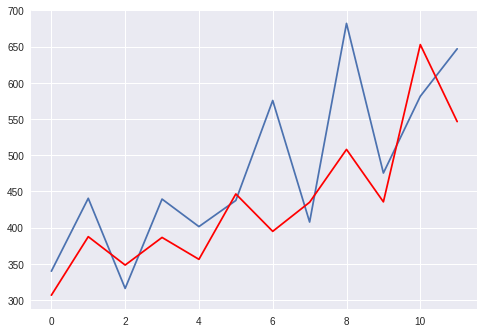

In [0]:
#predicting values with ARIMA
df = pd.read_csv(io.StringIO(uploaded['shampoo.csv'].decode('utf-8')))
train_data = df[0:24]
test_data = df[24:36]
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
train_data = train_data.astype(float)
train_data = train_data.values
test_data = test_data.astype(float)
test_data = test_data.values
predictions = list()
history = [x for x in train_data]

for t in range(len(test_data)):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test_data[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_data, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()